In [12]:
import numpy as np
from datetime import datetime

from whatever import get_raobs, select_press

import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import StationPlot
from metpy.interpolate import interpolate_to_grid, remove_nan_observations

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [28]:
#grab data from 00Z on 26 December 2023
dt = datetime(2022,12,12,12)
print(dt)

data = get_raobs(dt)

print(data)

2022-12-12 12:00:00
       pressure   height  temperature  dewpoint  direction  speed station  \
0         981.0    386.0        -16.9     -18.8      130.0    4.0    CWPL   
1         971.0    463.0        -14.9     -17.3        NaN    NaN    CWPL   
2         968.0    486.0        -11.7     -16.7        NaN    NaN    CWPL   
3         957.0    574.0         -8.1     -31.1        NaN    NaN    CWPL   
4         952.7    609.0          NaN       NaN      150.0   20.0    CWPL   
...         ...      ...          ...       ...        ...    ...     ...   
12852      17.5  26822.0          NaN       NaN      305.0   93.0    KYXY   
12853      16.6  27127.0          NaN       NaN      305.0  110.0    KYXY   
12854      15.8  27432.0          NaN       NaN      305.0   93.0    KYXY   
12855      14.5  27957.0        -67.7     -91.7        NaN    NaN    KYXY   
12856      14.4  28346.0          NaN       NaN      310.0   96.0    KYXY   

                     time     u_wind     v_wind  latitu

In [29]:
data_500 = select_press(data,500)
print(data_500)

       pressure  height  temperature  dewpoint  direction  speed station  \
46        500.0  5580.0        -24.1     -30.1      310.0   18.0    CWPL   
166       500.0  5400.0        -29.3     -36.3      250.0   54.0    CWQI   
293       500.0  5420.0        -30.3     -40.3      240.0   30.0    CWSE   
404       500.0  5460.0        -31.3     -37.3       35.0   31.0    CYAH   
503       500.0  5340.0        -32.9     -36.1      235.0   28.0    CYBK   
...         ...     ...          ...       ...        ...    ...     ...   
12343     500.0  5530.0        -21.9     -46.9      290.0   71.0    KWAL   
12448     500.0  5650.0        -16.9     -19.9      280.0   42.0    KXKF   
12559     500.0  5770.0        -13.9     -25.9      290.0   43.0    KXMR   
12666     500.0  5470.0        -28.7     -47.7       10.0   31.0    KYMW   
12781     500.0  5450.0        -16.3     -20.4      260.0   63.0    KYXY   

                     time     u_wind     v_wind  latitude  longitude  
46    2022-12-12

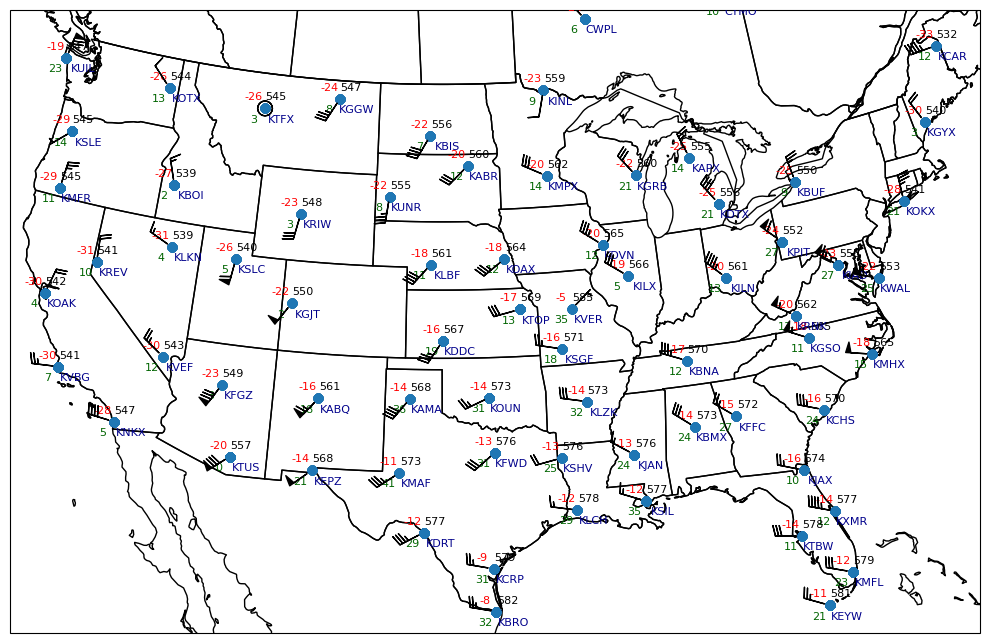

In [30]:
proj = ccrs.LambertConformal(central_longitude=-100,central_latitude=35)
#create 10" x 10" figure with a dpi=100
fig = plt.figure(figsize=(10,10),dpi=100)
#add subplot with projection
ax = fig.add_subplot(1,1,1,projection=proj)
#add elements to make map more useable
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

ax.set_extent((-120, -75, 23, 50))
fig.tight_layout()

locs = proj.transform_points(ccrs.PlateCarree(),data['longitude'].values,data['latitude'].values)
ax.scatter(data.longitude,data.latitude,transform=ccrs.PlateCarree(), zorder=9)

stationplots = StationPlot(ax, data_500['longitude'], data_500['latitude'], transform = ccrs.PlateCarree(),clip_on='True',fontsize=8)

#temperature in red
stationplots.plot_parameter((-1,1), data_500['temperature'].values, color='red')
#dewpoint DEPRESSION in dark green
stationplots.plot_parameter((-1,-1), data_500['temperature'].values - data_500['dewpoint'].values, color='darkgreen')
#height (need to format to be the first 3 digits)
stationplots.plot_parameter((1,1), data_500['height'].values,color='black',formatter=lambda v: format(v, '.0f')[:3])
#station ID in dark blue
stationplots.plot_text((1.5,-1), data_500['station'].values, color='darkblue')
#wind in black
stationplots.plot_barb(data_500['u_wind'].values, data_500['v_wind'].values, zorder=10)
#save the map as upper_air_500.png


In [31]:
#convert the data to x, y, and z locations on the projected map
x,y,z= proj.transform_points(ccrs.PlateCarree(), data_500['longitude'].values, data_500['latitude'].values).T

#remove nans
mask = ~np.isnan(x)

#interpolate the data to a grid
grdx,grdy,hght = interpolate_to_grid(x[mask],y[mask],data_500['height'].values[mask], interp_type='cressman',
                                     search_radius=1000000, minimum_neighbors=3,hres=100000)


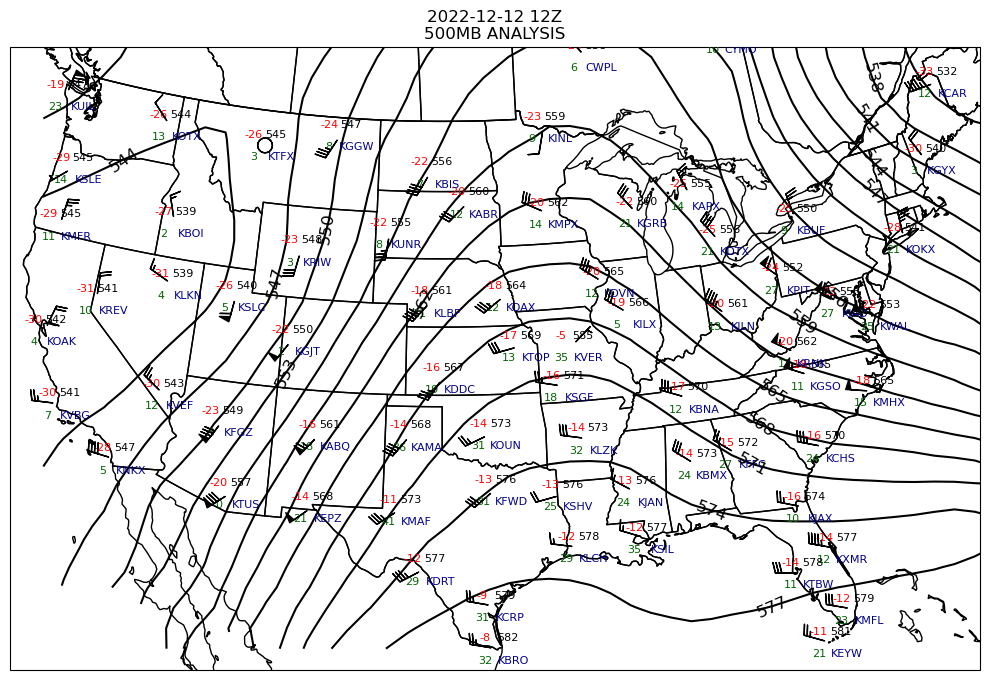

In [32]:
proj = ccrs.LambertConformal(central_longitude=-100,central_latitude=35)
#create 10" x 10" figure with a dpi=100
fig = plt.figure(figsize=(10,10),dpi=100)
#add subplot with projection
ax = fig.add_subplot(1,1,1,projection=proj)
#add elements to make map more useable
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

ax.set_extent((-120, -75, 23, 50))
fig.tight_layout()

locs = proj.transform_points(ccrs.PlateCarree(),data['longitude'].values,data['latitude'].values)

stationplots = StationPlot(ax, data_500['longitude'], data_500['latitude'], transform = ccrs.PlateCarree(),clip_on='True',fontsize=8)

#temperature in red
stationplots.plot_parameter((-1,1), data_500['temperature'].values, color='red')
#dewpoint DEPRESSION in dark green
stationplots.plot_parameter((-1,-1), data_500['temperature'].values - data_500['dewpoint'].values, color='darkgreen')
#height (need to format to be the first 3 digits)
stationplots.plot_parameter((1,1), data_500['height'].values,color='black',formatter=lambda v: format(v, '.0f')[:3])
#station ID in dark blue
stationplots.plot_text((1.5,-1), data_500['station'].values, color='darkblue')
#wind in black
stationplots.plot_barb(data_500['u_wind'].values, data_500['v_wind'].values, zorder=10)
#save the map as upper_air_500.png

#plot contours from 4600m to 6000m with 30m interval
clevs = np.arange(4600,6000,30)
ds = ax.contour(grdx,grdy,hght,clevs, colors='black')
#add a title with the date
ax.clabel(ds,inline=True,inline_spacing=0,fmt=lambda v: format(v, '.0f')[:3],fontsize=12)
plt.title(f'{dt.strftime("%Y-%m-%d %HZ")}\n500MB ANALYSIS')
#save the map as contour_500.png
plt.savefig('contour_500_1212_12.png')